# <font color =   #0000cc> <i> Clase 13 Programación I MCD 

## <font color= #0000FF> <i> MySQL en Python

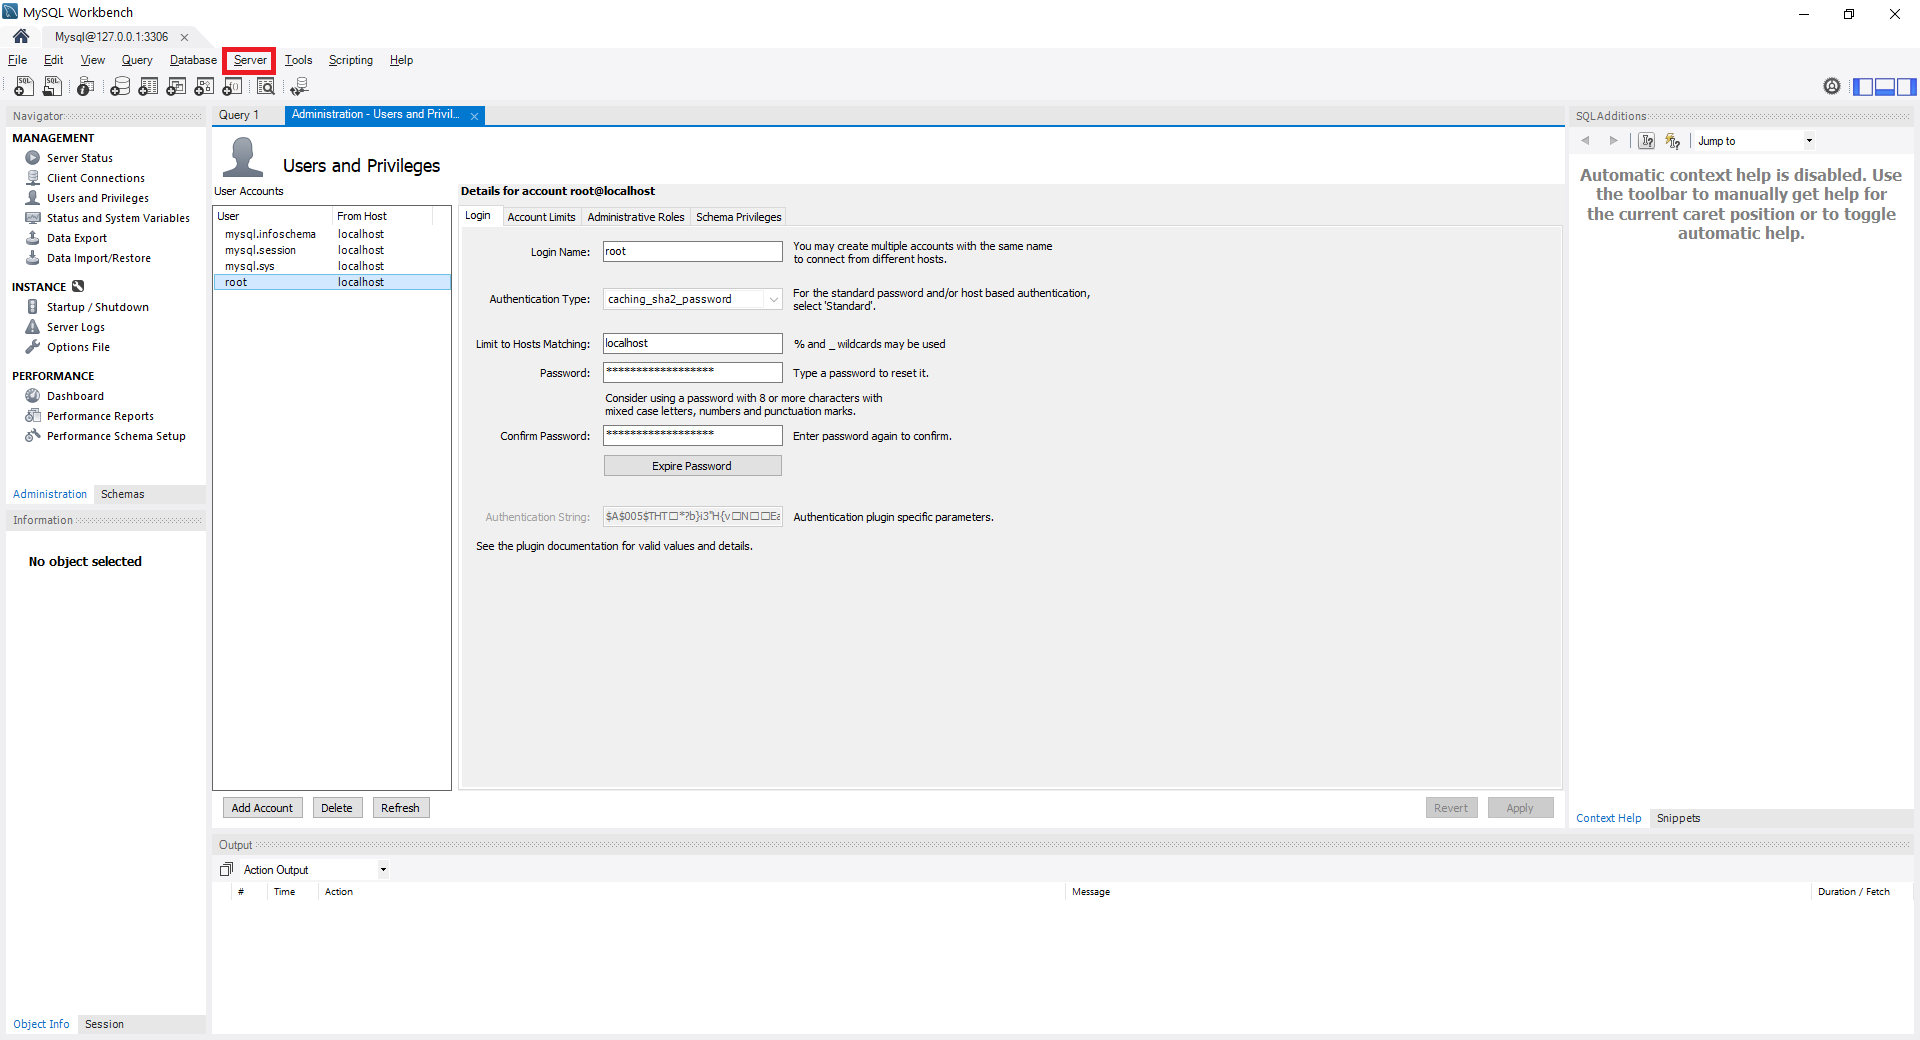

In [18]:
from IPython.display import Image
Image("MySQL.png", width=950,height=700)

### <b> <font color=  #6600CC > <i> Creando una Base de Datos desde Python

In [27]:
#Versión de MySQL utilizada: 8.0.22

import mysql.connector #instalar en el prompt de anaconda con pip install mysql-connector-python
    
try:                               
    
    conexion = mysql.connector.connect(host = 'localhost', 
                                   user = 'root',
                                   password = 'M0n1t0rB1anc0' 
                                   )    
    
    print('Conexión exitosa')

except: 

    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

#Indicamos lo que queremos que se lleve a cabo en memoria
cursor.execute("CREATE DATABASE DB_MySQL")  

#Nos aseguramos de cerrar la conexión
conexion.close()


Conexión exitosa


### <b> <font color=  #6600CC > <i> Creando una Tabla  a partir de un archivo csv

In [48]:
import pandas as pd #Contiene funciones que nos ayudan en el análisis de datos

#El archivo a cargar en una tabla no debe tener valores faltantes
carreras=pd.read_csv('C:/Users/rocio/Archivos en Jupyter/Bases de datos a analizar/Maraton NY completo.csv', 
                  engine='python') 
carreras


,Corredor,place,gender,age,home,time
0,3475,3592,Male,52,GBR,217.483333
1,13594,13853,Female,40,NY,272.550000
2,12012,12256,Male,31,FRA,265.283333
3,10236,10457,Female,33,MI,256.150000
4,9476,9686,Male,33,NY,252.250000
...,...,...,...,...,...,...
995,15972,16261,Male,61,FRA,285.883333
996,1090,1131,Male,37,GBR,191.916667
997,16419,16713,Female,53,IRL,289.016667
998,13977,14241,Female,21,NY,276.050000


In [49]:
type(carreras)

pandas.core.frame.DataFrame

In [50]:
Lista_valores =  carreras.values.tolist()
tuplas_lista = tuple(Lista_valores) 
tuplas_lista

([3475, 3592, 'Male', 52, 'GBR', 217.4833333],
 [13594, 13853, 'Female', 40, 'NY', 272.55],
 [12012, 12256, 'Male', 31, 'FRA', 265.2833333],
 [10236, 10457, 'Female', 33, 'MI', 256.15],
 [9476, 9686, 'Male', 33, 'NY', 252.25],
 [1720, 1784, 'Male', 40, 'NJ', 201.9666667],
 [15736, 16020, 'Female', 30, 'CA', 283.5666667],
 [10580, 10805, 'Male', 27, 'GBR', 255.8833333],
 [11957, 12201, 'Male', 42, 'NED', 264.25],
 [18933, 19266, 'Male', 48, 'B.C', 306.6833333],
 [14956, 15229, 'Female', 63, 'GBR', 281.2666667],
 [14987, 15260, 'Male', 49, 'ITA', 280.25],
 [10447, 10670, 'Male', 33, 'NY', 258.3333333],
 [10435, 10658, 'Male', 43, 'NY', 257.1333333],
 [191, 200, 'Male', 40, 'GER', 163.9333333],
 [9962, 10178, 'Male', 33, 'NY', 253.6166667],
 [2379, 2467, 'Male', 40, 'FRA', 206.2666667],
 [10505, 10729, 'Male', 36, 'NY', 257.9333333],
 [11853, 12093, 'Male', 49, 'SWE', 262.1333333],
 [12181, 12428, 'Female', 34, 'NY', 264.2166667],
 [2633, 2730, 'Male', 26, 'DEN', 209.7333333],
 [11935, 12

In [51]:
type(tuplas_lista)

tuple

In [53]:
#Versión de MySQL utilizada: 8.0.22

import mysql.connector #instalar en el prompt de anaconda con pip install mysql-connector-python
    
try:                               
    
    conexion = mysql.connector.connect(host = 'localhost', 
                                   user = 'root',
                                   password = 'M0n1t0rB1anc0', 
                                   database = 'DB_MySQL'
                                   )    
    
    print('Conexión exitosa')

except: 

    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

cursor.execute("CREATE TABLE MaratonNY_Python3(Corredor INTEGER, place INTEGER, gender VARCHAR(25), age INTEGER, home VARCHAR(255), tiempo FLOAT, PRIMARY KEY (Corredor))")

cursor.executemany("INSERT INTO MaratonNY_Python3(Corredor, place, gender, age, home, tiempo) VALUES(%s,%s,%s,%s,%s,%s)", tuplas_lista)

#Guardamos los cambios hechos a la Base de Datos
conexion.commit()    

#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa


### <b> <font color=  #6600CC > <i> Borrando una Tabla en MySQL

In [1]:
#Versión de MySQL utilizada: 8.0.22

import mysql.connector #instalar en el prompt de anaconda con pip install mysql-connector-python
    
try:                               
    
    conexion = mysql.connector.connect(host = 'localhost', 
                                   user = 'root',
                                   password = 'M0n1t0rB1anc0', 
                                   database = 'DB_MySQL'
                                   )    
    
    print('Conexión exitosa')

except: 

    print('La conexión no fué exitosa')
    
#Creamos un cursor para almacenar la información en memoria
cursor = conexion.cursor()

cursor.execute("DROP TABLE MaratonNY_Python")

#Guardamos los cambios hechos a la Base de Datos
conexion.commit()    

#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa


# <font color= #0000FF> <i> Regresamos a SQL Server 

## <font color= #0000FF> <i> Utilizando Variables en nuestras Consultas en SQL Server

In [16]:
import pandas as pd
import pyodbc 

server = 'PROBOOK-ROCIO'
bd = 'DB_Python2'
    
try:                               
    
    conexion = pyodbc.connect(driver='{SQL server}', host = server, database = bd)                              
    print('Conexión exitosa')

except: 

    print('La conexión no fué exitosa')
    

#Utilizamos tres comillas para poder colocar el código de SQL en varias líneas
seleccionados = pd.read_sql("""DECLARE @var VARCHAR(8)   -- Creamos la variable que contendrá la información
                                SET @var='Married'       -- Le indicamos el valor de la variable
                                
                                SELECT Ciudad, Estado_Civil 
                                FROM Datos_Personales_Python 
                                WHERE Estado_Civil = @var """, conexion)

print(seleccionados)

#Nos aseguramos de cerrar la conexión
conexion.close()

Conexión exitosa
             Ciudad Estado_Civil
0           Concord      Married
1         Scottdale      Married
2       Beavercreek      Married
3            Dublin      Married
4        Brigantine      Married
5           Merrill      Married
6          Chehalis      Married
7        Big Rapids      Married
8           Lindale      Married
9    Cathedral City      Married
10       San Angelo      Married
11       Snoqualmie      Married
12         Valdosta      Married
13         Ringwood      Married
14        Mahtomedi      Married
15             Star      Married
16       Park Ridge      Married
17         Aberdeen      Married
18     Canal Fulton      Married
19   Stoke-on-Trent      Married
20        Liverpool      Married
21     Huddersfield      Married
22          Walsall      Married
23           Bolton      Married
24          Watford      Married
25          Crawley      Married
26          Ipswich      Married
27         Bradford      Married
28       Manchester      M

## <font color= #0000FF> <i> Combinando las Interfaces Gráficas con SQL Server

### <b> <font color=  #6600CC > <i>  Filtrando información desde una interfaz gráfica

IMPORTANTE: 
    
    CREAR EL SCRIPT EN SUBLIME TEXT Y CORRERLO DESDE EL PROMPT DE ANACONDA

Utilizando Cajas Combo y filtrando dos valores de nuestros datos

## <font color= #0000FF> <i> Tarea

Crear una aplicación en la que lleven a cabo filtros de al menos variables 